# Исследование объявлений о продаже квартир

#Цель анализа
Для построения автоматизированной системы по отслеживанию аномалий и мошеннической деятельности необходимо выявить параметры, влияющие на рыночную стоимость объектов недвижимсти.

#Данные
Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Часть данных вписаны пользователем, часть — получены автоматически на основе картографических данных.

# Общая информация о данных

In [ ]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#загружаем локальные данные
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#сохраняем в переменную загруженный датасет
#при первом чтении csv  файла оказалось, что данные склеились в одну строку, колонки разделили, объявив параметр sep
data = pd.read_csv(open('real_estate_data.csv', 'rb'), sep='\t')

data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
total_images,20,7,10,0,2,10,6,5,20,18,5,9,10,20,1,16,11,6,8,16
last_price,13000000.0,3350000.0,5196000.0,64900000.0,10000000.0,2890000.0,3700000.0,7915000.0,2900000.0,5400000.0,5050000.0,3300000.0,3890000.0,3550000.0,4400000.0,4650000.0,6700000.0,4180000.0,3250000.0,14200000.0
total_area,108.0,40.4,56.0,159.0,100.0,30.4,37.3,71.6,33.16,61.0,39.6,44.0,54.0,42.8,36.0,39.0,82.0,36.0,31.0,121.0
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00,2018-09-10T00:00:00,2017-11-02T00:00:00,2019-04-18T00:00:00,2018-05-23T00:00:00,2017-02-26T00:00:00,2017-11-16T00:00:00,2018-08-27T00:00:00,2016-06-30T00:00:00,2017-07-01T00:00:00,2016-06-23T00:00:00,2017-11-18T00:00:00,2017-11-23T00:00:00,2016-09-09T00:00:00,2017-01-27T00:00:00,2019-01-09T00:00:00
rooms,3,1,2,3,2,1,1,2,1,3,1,2,2,2,1,1,3,1,1,3
ceiling_height,2.7,NaN,NaN,NaN,3.03,NaN,NaN,NaN,NaN,2.5,2.67,NaN,NaN,2.56,NaN,NaN,3.05,NaN,2.5,2.75
floors_total,16.0,11.0,5.0,14.0,14.0,12.0,26.0,24.0,27.0,9.0,12.0,5.0,5.0,5.0,6.0,14.0,5.0,17.0,5.0,16.0
living_area,51.0,18.6,34.3,NaN,32.0,14.4,10.6,NaN,15.43,43.6,20.3,31.0,30.0,27.0,17.0,20.5,55.6,16.5,19.4,76.0
floor,8,1,4,9,13,5,6,22,26,7,3,4,5,5,1,5,1,7,2,8
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border:solid green 2px; padding: 20px">  
При чтении файла сразу видим, что в данных есть пропуски. Заголовок столбца "cityCenters_nearest" в "верблюжьем" регистре, решаем заменить  на однородный нижний регистр, а также проверим тип данных и изучим общую информацию: </div>

In [ ]:
#приведение заголовка к норме, выведение основной информации по данным
data = data.rename(columns={"cityCenters_nearest":"city_centers_nearest"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Гистограммы числовых значений


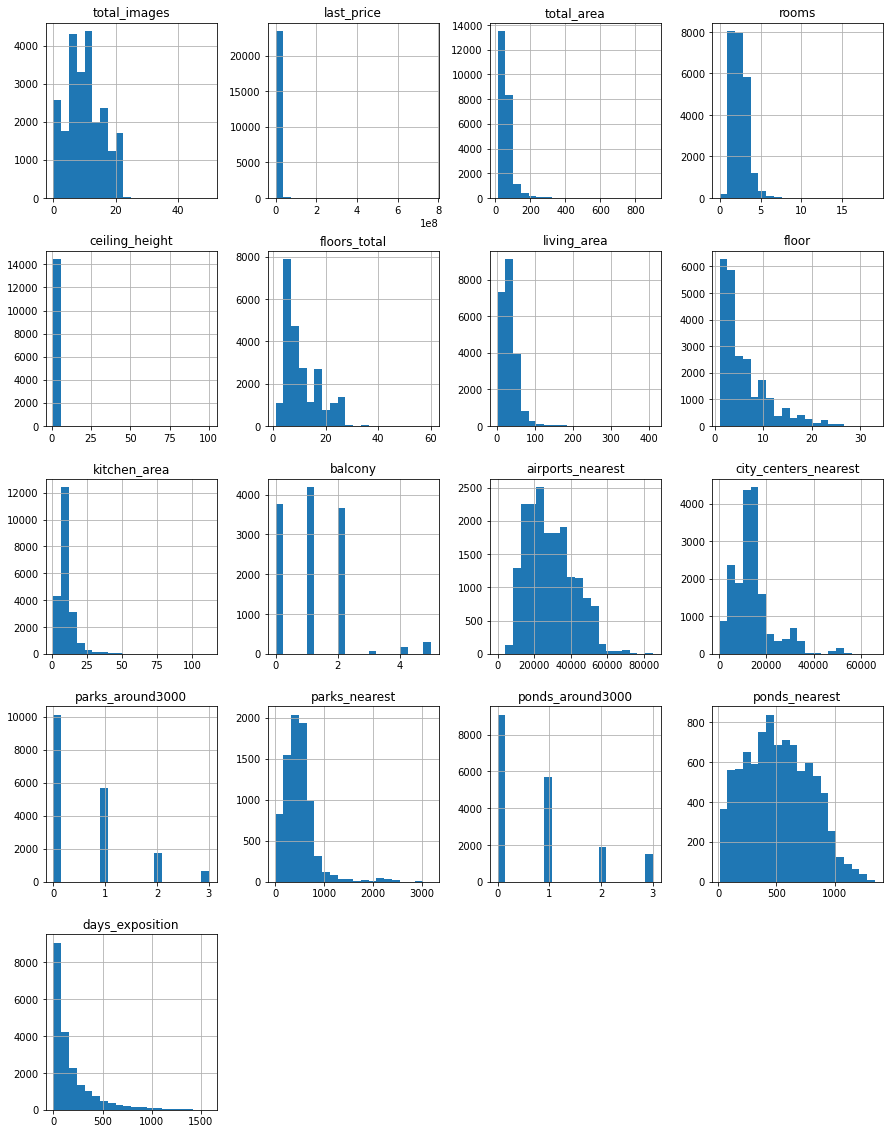

In [ ]:
#Посмотрим на распределение числовых данных, пригодится в дальнейшем для сравнения с данными после обработки
#гисторгамма показывает нам частоту значений (ось Y)
print('Гистограммы числовых значений')
data.select_dtypes(include=np.number).hist(figsize=(15, 20), bins=20)
plt.show()

<div style="border:solid green 2px; padding: 20px">  
<b>Вывод:</b>
    Дана таблица размерностью 23699 строки, 22 столбца, преимущественно числового типа float64, также имеются типы: int64, object, bool. Таким образом таблица соделжит как количественные, так и категориальные переменные.  Столбец <b>first_day_exposition</b>, хранящий информацию о дате публикации, необходимо будет <b>преобразовать</b> в тип <b>datetime</b> для удобства дальшейшего использования; столбец <b>floors_total</b> - к int. В большинстве столбцов <b>имеются пропуски</b>. По гистограммам видим, что <b>вероятно имеются выбросы</b> в столбцах <b>last_price, total_area, living_area, kitchen_area, ceiling_height ("хвост" гистограммы уходит до 100 метров)</b>. У рассмотренных столбцов с числовыми значениями преимущественно положительная ассиметрия со смещением вправо с длинным тяжелым хвостом (у вышеперечисленных столбцов)</div>

# Предобработка данных

## Находим и изучаем пропущенные значения в столбцах:

In [ ]:
#вычислим долю пропусков по столбцам:
data.isna().mean().sort_values(ascending=False).mul(100).round(3) #вычисляем долю пропусков по столбцам

is_apartment            88.291
parks_nearest           65.910
ponds_nearest           61.560
balcony                 48.605
ceiling_height          38.799
airports_nearest        23.385
city_centers_nearest    23.288
ponds_around3000        23.284
parks_around3000        23.284
days_exposition         13.423
kitchen_area             9.612
living_area              8.030
floors_total             0.363
locality_name            0.207
total_images             0.000
last_price               0.000
studio                   0.000
floor                    0.000
rooms                    0.000
first_day_exposition     0.000
total_area               0.000
open_plan                0.000
dtype: float64

<div style="border:solid green 2px; padding: 20px">  <b>Вывод</b>: Имеется критичное количество пропусков в столбцах <b>balcony (49%), is_apartment (88%), ceiling_height (38%), parks_nearest (66%), ponds_nearest (61%)</b>; строки, содержащие пропуски в этих столбцах мы удалить не можем. Допустимой долей пропусков считаем 10%, их в случае необходимости можно будет удалить. Известно, что столбцы balcony, is_apartment, ceiling_height заполняются пользователем, остальные - на основе картографических данных. Можно предположить что столбцы, заполняемые пользователем не были полностью заполнены (т.е. причина пропусков - человеческий фактор), а в столбцах заполняемых автоматически в какой-то момент из-за технической ошибки картографические  данные не подтянулись.  Критичное количество пропусков в <b>parks_nearest</b> и <b>ponds_nearest</b>, а также в столбцах заполняемых автоматически (<b>airports_nearest, city_centers_nearest, ponds_around3000, parks_around3000) оставляем без изменений</b>. Строки с пропусками в <b>locality_name </b>, <b>floors_total</b>,<b>living_area</b>, <b>kitchen_area</b> возможно позже придётся удалить либо дополнительно проверить. Столбец <b>days_exposition</b> содержит данные о количестве дней с момента публикации до снятия; предполгаем что отсутствие значения связно с тем, что объявление ещё актуально и не было снято. Заполнять пропуски в данном столбце не будем. Ниже <b>проверим гипотезу, что в столбце is_apartment</b> пропуски возникли в связи с тем, что пользователь проигнорировал характеристику из-за отсутствия таковой у квартиры:
 </div>

In [ ]:
#посчитаем количество значений в столбце 'is_apartment'
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [ ]:
#посчитаем количество значений в столбце 'open_plan'
data.open_plan.value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

In [ ]:
#посчитаем количество значений в столбце 'studio'
data.studio.value_counts()

False    23550
True       149
Name: studio, dtype: int64

<div style="border:solid green 2px; padding: 20px"> Поскольку высока вероятность того, что пропуски в столбце <b>is_apartment</b> связаны с тем, что пользователь не внёс данные, подразумевая, что квартира не является апартаментами, а также тот факт, что столбцы open_plan и studio - также булевые и по ним видно, что значение True занимает незначительную часть в выборке, принимаем решение заменить пропуски в <b>is_apartment</b> на <b>False</b>. Вероятно, что и по столбцу <b>balcony</b> отсутствие значения связано с отсутствием балкона, таким образом, заполним пропуски <b>"0"</b>. Строки с пропусками в locality_name и floors_total удалим, поскольку они составляют менее 1% от всего числа и не исказят дальнейшие рассчёты. Проверим, нет ли пропусков в <b>kitchen_area</b>, которые относятся к типам "студия" или "открый план". Если они есть, заменим на <b>0</b>.</div>

In [ ]:
#заполняем пропуски
df = data
df['is_apartment'] = df['is_apartment'].fillna(False)
df['balcony'] = df['balcony'].fillna(0)

In [ ]:
# удаляем пропуски в столбцах locality_name и floors_total
df = df.dropna(subset=['locality_name', 'floors_total']).reset_index(drop=True)

In [ ]:
#выясним количество пропусков в столбце kitchen_area
df.kitchen_area.isna().sum()

2222

In [ ]:
#проверяем, нет ли пропусков в 'kitchen_area', которые относятся к типам "студия" или "открый план".
#Если они есть, заменим на 0
print('Total rows:', len(df))
columns = ['studio', 'open_plan', 'kitchen_area',
          ]
df_no_kitchen = df[columns]
df_no_kitchen[((df_no_kitchen['studio']==True)|
               (df_no_kitchen['open_plan']==True)) &
              (df_no_kitchen['kitchen_area'].isna()==True)
             ]

Total rows: 23565


,studio,open_plan,kitchen_area
144,True,False,NaN
347,False,True,NaN
438,True,False,NaN
505,False,True,NaN
605,True,False,NaN
...,...,...,...
23079,True,False,NaN
23310,False,True,NaN
23422,True,False,NaN
23459,False,True,NaN


In [ ]:
#заменим на 0 те пропуски в kitchen_area что относятся к студии и открытому плану
df.loc[((df['studio']==True)|(df['open_plan']==True)) & (df['kitchen_area'].isna()==True), 'kitchen_area'] = 0

In [ ]:
#проверка
df.kitchen_area.isna().sum()

2009

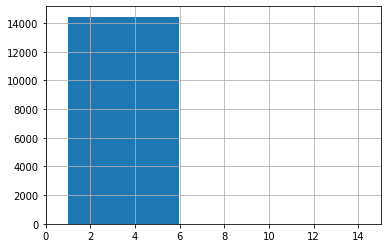

In [ ]:
#выясним основной диапазон значений столбца "высота потолка"
df.ceiling_height.hist(bins=20)
plt.xlim(0,15)
plt.show()

<div class="alert alert-info"> <b>Комментарий:</b>: Здесь была возможность заполнения пропусков в столбце "высота потолка" модой или медианой, но мною было принято решение провести заполнение данных позже, на шаге 2.4, уже после очистки и дополнительной категоризации в зависимсти от удаленности от центра. Я не решилась делать просто медианой, которая типичными 2,65 все 39% пропусков закроет, поскольку в Петербурге много домов с высокими потолками (например в радиусе 4,5 км от центра практически не встретишь 2,65 потолки). </div>

### Проверим тип данных в каждом столбце:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21556 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

<div style="border:solid green 2px; padding: 20px"><b>Вывод</b>: после заполнения пропусков в столбце is_apartment, тип данных сменился с object на bool; в таком случае осталось преобразовать данные в столбцах <b>first_day_exposition</b> в <b>datetime</b> (дата должна быть в соответствующем формате), а  <b>balcony</b>, <b>floors_total</b> в <b>int</b> т.к. по логике подобные значения должны быть целочисленными </div>

In [ ]:
#изменяем тип данных
df['balcony'] = df['balcony'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты:

<div style="border:solid green 2px; padding: 20px"> Выведем уникальные значения населённых пунктов из столбца 'locality_name'</div>

In [ ]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

<div style="border:solid green 2px; padding: 20px"> <b>Обнаружено 2 проблемы:</b> 1)различия в написании слова "поселок" через "е" и через "ё" задваивают уникальные значения; 2) сам классификционный признак (поселок/пгт/деревня и т.д) также плодят дубликаты (н-р Мурино и поселок Мурино). Решаем, что обе проблемы необходимо исправить. </div>

In [ ]:
#Шаг 1: заменяем ё на е
df['new_loc_name'] = df['locality_name'].str.replace('ё','е', regex=True)
df['new_loc_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

In [ ]:
#Шаг 2: убираем классификционный признак
wrong_values = ['городской ', 'городского ', 'поселок ', 'типа ', 'деревня ', 'коттеджный ', 'при железнодорожной ', 'садоводческое ' ,'некоммерческое ', 'товарищество ', 'садовое ', 'село ']

for wrong in wrong_values:
    df['new_loc_name'] = df['new_loc_name'].str.replace(wrong, '')

print('Кол-во значений до:', df['locality_name'].nunique())
print('Кол-во значений после:', df['new_loc_name'].nunique())

Кол-во значений до: 364
Кол-во значений после: 306


In [ ]:
df['new_loc_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Виллози',
       'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичев

### Найдём и устраним редкие и выбивающиеся значения:

In [ ]:
#выведем описательную статистику по нашему датафрейму
pd.options.display.float_format = "{: .2f}".format
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.00,23565.00,23565.00,23565.00,14481.00,23565.00,21700.00,23565.00,21556.00,23565.00,18041.00,18064.00,18065.00,8030.00,18065.00,9036.00,20394.00
mean,9.88,6540058.26,60.32,2.07,2.77,10.68,34.45,5.88,10.46,0.59,28797.08,14192.66,0.61,490.58,0.77,518.29,180.74
std,5.68,10910934.72,35.66,1.08,1.26,6.59,22.05,4.87,5.96,0.96,12632.50,8613.35,0.80,341.57,0.94,278.01,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,0.00,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.51,5.00,18.60,2.00,7.00,0.00,18565.00,9238.00,0.00,288.00,0.00,293.00,45.00
50%,9.00,4646000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,26757.00,13096.50,0.00,455.00,1.00,503.00,95.00
75%,14.00,6790000.00,69.70,3.00,2.80,16.00,42.30,8.00,12.00,1.00,37273.00,16285.00,1.00,612.00,1.00,730.00,231.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


<div style="border:solid green 2px; padding: 20px"> Обращаем внимание на большую разницу между Q3 и максимальным значением в столбцах last_price, total_area, ceiling_height, floors_total, living_area, kitchen_area. Вызывает подозрение наличие в выборке таких аномальных значений у жилых площадей, потолков (минимальная высота - 1 метр, максимальная - 100), этажности дома (самым высоким жилым домом в Спб является ЖК Александр Невский - 37 этажей). Необходимо проверить уникальные значения столбца ceiling_height, а также построить диаграммы размаха для определения выбросов в остальных столбцах:</div>

In [ ]:
#выводим уникальные значения столбца с высотой потолка
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

<div style="border:solid green 2px; padding: 20px"> В уникальных значениях встречаются данные, возможно внесенные некорректно - 25, 26 , 27 метров и выше. Предположим, что на самом деле это 2.5, 2.6, 2.7, 3.2 метров, что вполне допустимо. Приведем к корректному виду данные значения, визуализируем распределение на диаграмме размаха и затем удалим выбросы (за норму принимаем высоту от 2.4 метров, в соответствии с нормами СНиП.)</div>

In [ ]:
#корректируем значения
for i in df['ceiling_height']:
    if i >=24:
        df['ceiling_height'] = df['ceiling_height'].replace(i, i/10)

df['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.3 ,  2.34,  2.4 ,
        2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,
        2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,
        2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,
        2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,
        2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,
        2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,
        2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,
        3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,
        3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,
        3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,
        3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,
        3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,
        3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,
        3.66,  3.67,

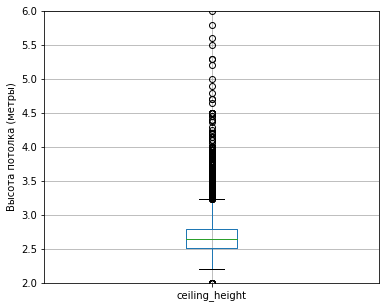

In [ ]:
#строим боксплот для определения аномалий
df['ceiling_height'].plot(kind='box', figsize=(6, 5), grid=True)
plt.ylim(2, 6)
plt.ylabel('Высота потолка (метры)')
plt.show()

In [ ]:
#считаем границы нормального распределения по "усам":
q1 = df['ceiling_height'].quantile(0.25)
q3 = df['ceiling_height'].quantile(0.75)
bc1 = q1 - 1.5*(q3-q1)
bc2 = q3 + 1.5*(q3-q1)
print('нижняя граница:', bc1)
print("верхняя граница:", bc2)

нижняя граница: 2.0749999999999997
верхняя граница: 3.235


In [ ]:
#считаем, сколько данных от всей таблицы останется, если срежем данные по боксплоту:
len(df[df['ceiling_height'].between(bc1, bc2)])/(len(df))

0.5806068321663485

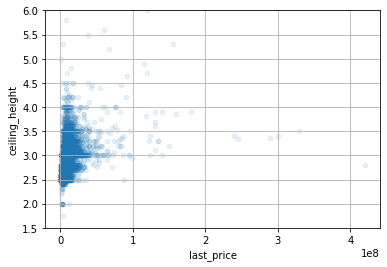

In [ ]:
#проверим, в каких границах прослеживается связь цены на квартиру и высоты потолков (а так же есть ли эта связь):
df.plot(x='last_price', y='ceiling_height', kind='scatter', grid=True, alpha = 0.1)
plt.ylim(1.5, 6)
plt.show()

<div style="border:solid green 2px; padding: 20px"> 42% данных (по диаграмме размаха) - это очень много для удаления; нам также стоит учитывать тот факт, что
в Петербурге есть много дореволюционных домов с потолками до 4.6. Также имея гипотезу о зависимости цены квартиры от высоты потолков и проверив её наличие по диаграмме рассеяния, отметим, что скопление значений находятся между примерно 2.4 и 4.5 метров. Поэтому сложив данные из открытых источников и данные, полученные благодаря расчётам и визуализации, принимаем решение не срезать всё, что боксплот отобразил как выбросы (потолок до 3.2), а считать выбросами значения ниже 2.4 метра и выше 4.7. </div>

In [ ]:
#убираем выбросы
df_new = df.drop(df[(df['ceiling_height']<2.4)|(df['ceiling_height']>4.65)].index)

In [ ]:
#проверка
df_new.ceiling_height.sort_values().unique()

array([2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54,
       2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65,
       2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76,
       2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87,
       2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21,
       3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
       3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44,
       3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55,
       3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68,
       3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86,
       3.87, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.15,
       4.19, 4.2 , 4.25, 4.3 , 4.37, 4.4 , 4.45, 4.

<div style="border:solid green 2px; padding: 20px"> <b>Теперь, после того, как мы удалили выбросы, заполним пропуски (39% от всех значений) в ceiling_height медианой.</b> Но перед этим мы создадим столбец, в котором будет указана  категория потолка (высокий/стандартный) в зависимости от удалённости от центра - у нас есть предположение, что в радиусе 5,5 км от центра (точка отсчёта - Александровская колонна) потолки в квартирах с большой вероятностью высокие, поскольку это районы элитной, сталинской и дореволюционной застройки. Всё, что дальше - заполним медианным значением для категории "стандартные потолки". Такая дополнительная категоризация была принята из-за того, что если взять просто медиану по столбцу, её значение будет стандартные 2.65 метров (указана в таблице describe)</div>

In [ ]:
#функция, сортирующая дореволюционные квартиры в центре и районы типовой застройки
def categorize_hight(category):
    if category<5500:
        return 'высокие потолки'
    else:
        return 'стандартные потолки'


In [ ]:
df_new['category'] = df_new['city_centers_nearest'].apply(categorize_hight)

In [ ]:
#вычисляем медиану для центральных районов и для спальных районов
median_by_category = pd.pivot_table(df_new, index = 'category', values = 'ceiling_height', aggfunc = 'median')
median_by_category

,ceiling_height
category,
высокие потолки,3.10
стандартные потолки,2.60


In [ ]:
#выводим число пропусков в столбце с высотой потолка
df_new['ceiling_height'].isna().sum()

9084

In [ ]:
#для каждого элемента списка [тип потолков] замени отфильтрованные строки табл. на медианное значение
for type in df_new['category'].unique():
    df_new.loc[(df_new['category'] == type)&(df_new['ceiling_height'].isna()), 'ceiling_height'] = \
    df_new.loc[(df_new['category']==type), 'ceiling_height'].median()

In [ ]:
#проверяем число пропусков в столбце
df_new['ceiling_height'].isna().sum()

0

<div style="border:solid green 2px; padding: 20px"> Далее построим боксплоты по данным о метражности квартир и определим, какие значения считать выбросами</div>

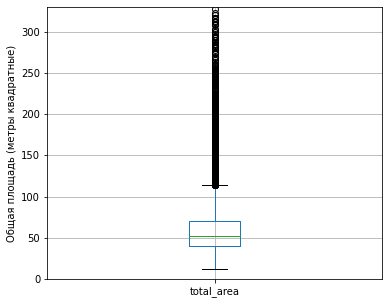

In [ ]:
#построим диаграмму размаха для общей площади
df_new['total_area'].plot(kind='box', figsize=(6, 5), grid=True)
plt.ylim(0, 330)
plt.ylabel('Общая площадь (метры квадратные)')
plt.show()


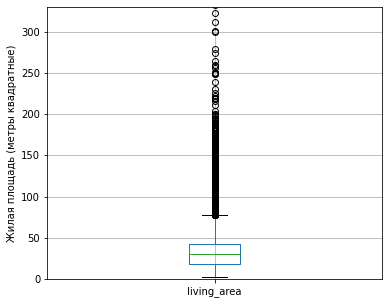

In [ ]:
#построим диаграмму размаха для жилой площади
df_new['living_area'].plot(kind='box', figsize=(6, 5), grid=True)
plt.ylim(0, 330)
plt.ylabel('Жилая площадь (метры квадратные)')
plt.show()

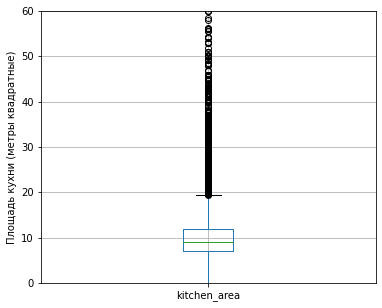

In [ ]:
#построим диаграмму размаха для площади кухни
df_new['kitchen_area'].plot(kind='box', figsize=(6, 5), grid=True)
plt.ylim(0, 60)
plt.ylabel('Площадь кухни (метры квадратные)')
plt.show() #58 m2

<div style="border:solid green 2px; padding: 20px"> Проверим, какого количества данных мы лишимся, если срежем всё, что выходит за рамки "усов". Для этого узнаем границы нормального распределения и проверим, какую долю занимают выбросы в общем количестве данных: </div>

In [ ]:
#считаем границы нормального распределения по "усам":
q1_t = df_new['total_area'].quantile(0.25)
q3_t = df_new['total_area'].quantile(0.75)
b1 = q1_t - 1.5*(q3_t-q1_t)
b2 = q3_t + 1.5*(q3_t-q1_t)
print('нижняя граница:', b1)
print("верхняя граница:", b2)

нижняя граница: -4.550000000000004
верхняя граница: 114.25


In [ ]:
#считаем долю выбросов по общей площади
df_new[df_new['total_area']>=114.25].shape[0]/df.shape[0]

0.05228092510078506

In [ ]:
#считаем границы нормального распределения по "усам":
q1_l = df_new['living_area'].quantile(0.25)
q3_l = df_new['living_area'].quantile(0.75)
bl1 = q1_l - 1.5*(q3_l-q1_l)
bl2 = q3_l + 1.5*(q3_l-q1_l)
print('нижняя граница:', bl1)
print("верхняя граница:", bl2)

нижняя граница: -16.949999999999996
верхняя граница: 77.85


In [ ]:
#считаем долю выбросов по жилой площади
df_new[df_new['living_area']>=77.85].shape[0]/df.shape[0]

0.03242096329301931

In [ ]:
#считаем границы нормального распределения по "усам"
q1_k = df_new['kitchen_area'].quantile(0.25)
q3_k = df_new['kitchen_area'].quantile(0.75)
bk1 = q1_k - 1.5*(q3_k-q1_k)
bk2 = q3_k + 1.5*(q3_k-q1_k)
print('нижняя граница:', bk1)
print("верхняя граница:", bk2)

нижняя граница: -0.5
верхняя граница: 19.5


In [ ]:
#считаем долю выбросов по площади кухни
df_new[df_new['kitchen_area']>=19.5].shape[0]/df.shape[0]

0.05041374920432845

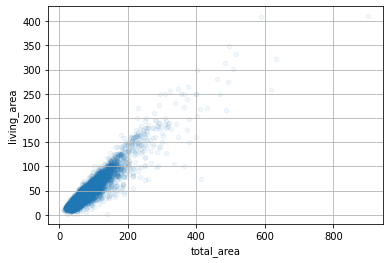

In [ ]:
#строим совместную диаграмму распределения total_area и living_area
df_new.plot(x='total_area', y='living_area', kind='scatter', grid=True, alpha=0.06)
plt.show()

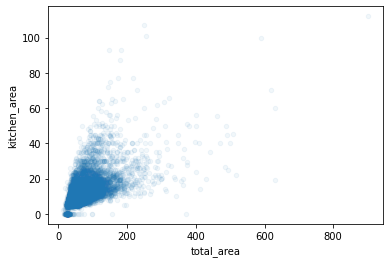

In [ ]:
#строим совместную диаграмму распределения total_area и kitchen_area
df_new.plot(x= 'total_area', y= 'kitchen_area', kind='scatter', alpha=0.06)
plt.show()

In [ ]:
#определяем объём теряемых при срезе по верхней границе боксплота данных:
df_new[(df_new['kitchen_area']>=19.5)|(df_new['living_area']>=77.85)|(df_new['total_area']>=114.25)].shape[0]/df.shape[0]

0.0825800976023764

<div style="border:solid green 2px; padding: 20px"> Если удалим данные, которые выходят за верхнюю границу диаграммы размаха, потеряем около 8% данных, что допустимо. К тому же на диаграмме рассеяния видим, что самая наглядная зависимость как раз в пределах оставляемых нами данных, тренд в любом случае виден.</div>

<div style="border:solid green 2px; padding: 20px"> Дополнительно проверим, есть ли в таблице недостоверные данные (так, для любых квартир не возможно чтобы общая площадь и жилая были равны (как минимум площадь туалета будет разницей у этих двух показателей); также недостоверными являются данные, в которых общая площадь квартиры меньше, чем сумма жилых комнат и кухни. Попробуем найти их и удалить.</div>

In [ ]:
#проверка на несоответствие
df_new[(df_new['total_area']<= df_new['living_area'])]
#получем 2 квартиры открытой плнировки, кухня 0, с балконами, жилая и общая площадь равны

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_loc_name,category
9814,10,2350000.00,25.00,2017-12-03,0,2.60,22,25.00,17,False,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,13.00,Мурино,стандартные потолки
12620,1,3700000.00,24.20,2017-11-10,0,2.60,19,24.20,13,False,...,Санкт-Петербург,17837.00,16840.00,0.00,NaN,2.00,210.00,74.00,Санкт-Петербург,стандартные потолки


In [ ]:
#Проверим, есть ли строки, в которых сумма площадей кухни и жилой превышает общую площадь
df_new[
    (df_new['kitchen_area'] + df_new['living_area'] > df_new['total_area'])&
    (df_new['living_area'].notna())&
    (df_new['kitchen_area'].notna())
].shape[0]

64

In [ ]:
#выведем текущее кол-во строк таблицы для проверки перед удалением
df_new.shape[0]

23523

In [ ]:
#удалим строки, в которых общая и жилая площади равны, а также строки,
#в которых общая площадь меньше суммы площадей кухни и жилых помещений

df_new = df_new.drop(
    df_new[
        (df_new['total_area'] == df_new['living_area'])|
        ((df_new['kitchen_area'] + df_new['living_area']) > df_new['total_area'])
    ].index
)

In [ ]:
df_new.shape[0]

23457

In [ ]:
#Так как минимальное значение'living_area' в таблице describe = 2 кв.м, проверим, можно ли их считать достоверными
df_from_user = df_new.iloc[:, np.r_[1:15, 16]]
df_from_user[df_from_user['living_area']<5]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,city_centers_nearest
3228,4440000.00,41.00,2017-07-02,1,2.60,17,3.00,17,False,False,False,11.00,0,Санкт-Петербург,13073.00
13837,6350000.00,52.00,2018-02-06,2,3.00,6,2.00,2,False,False,False,9.00,0,Санкт-Петербург,6521.00
21634,2330000.00,23.00,2018-01-01,0,2.60,24,2.00,22,False,True,False,0.00,0,посёлок Мурино,NaN
23442,64990000.00,139.00,2015-11-24,3,3.00,8,3.00,8,False,False,False,16.00,1,Санкт-Петербург,5975.00


<div style="border:solid green 2px; padding: 20px"> Судя по соотношениям общей/жилой/площади кухни у отфильтрованных строк, в данных явно есть ошибка; так как строк не много, удалим их вместе с расчитанными ранее верхними границами; минимальное значение 'total_area' = 12 м2 признаём верным, поскольку могут продаваться комнаты в коммуналке.   </div>

In [ ]:
#удалим выбросы в столбцах с данными о площади::

df_new = df_new.drop(
    df_new[
        (df_new['kitchen_area']>20)|
        (df_new['living_area']>78)|
        (df_new['living_area']<5)|
        (df_new['total_area']>115)
    ].index
)

In [ ]:
#проверим, скольо данных от общего объема осталось:
df_new.shape[0]/data.shape[0]

0.9140048103295497

<div style="border:solid green 2px; padding: 20px"> В столбцах kitchen_area и living_area все еще имеются пропуски; так как пропусков больше 10%, необходимо их заполнить. Так же как и при заполнении потолков, разобъем данные по категориям (у нас как раз после среза выбросов остаются площади, характерные для стандартных одно/двух/трёх комнатных квартир), а затем в соответствии с категорией заполним пропуски медианой, так как в выборке имеется значительное количество очень маленьких квартир (по гистограмме), таким образом не разбивая на подкатегории и заполняя средним мы с большей вероятностью исказим картину </div>

In [ ]:
#считаем количество пропусков "площадь кухни"
df_new.kitchen_area.isna().sum()

1888

In [ ]:
#считаем количество пропусков "жилая площадь"
df_new.living_area.isna().sum()

1707

Заполнять пропуски будем медианой, предварительно рассчитав её для каждой категории, поделив метраж на большой, средний и маленький

In [ ]:
#разбиваем жилую площадь на категории
def categorize_living(category):
    if category>=55:
        return 'большая'
    elif 55>category>20:
        return 'средняя'
    else:
        return 'маленькая'

In [ ]:
#применяем функцию categorize_living и создаем новый столбец
df_new['category_living'] = df_new['living_area'].apply(categorize_living)

In [ ]:
#Заполняем пропуски в столбце "жилая площадь" медианой соответствующей категории:

for type in df_new['category_living'].unique():
    df_new.loc[(df_new['category_living'] == type)&(df_new['living_area'].isna()), 'living_area'] = \
    df_new.loc[(df_new['category_living']==type), 'living_area'].median()

In [ ]:
#разбиваем площадь кухни на категории
def categorize_kitchen(category):
    if category>=15:
        return 'большая'
    elif 15>category>8:
        return 'средняя'
    else:
        return 'маленькая'

In [ ]:
#применяем функцию categorize_kitchen и создаем новый столбец
df_new['category_kitchen'] = df_new['kitchen_area'].apply(categorize_kitchen)

In [ ]:
#Заполняем пропуски в столбце "площадь кухни" медианой соответствующей категории:
for type in df_new['category_kitchen'].unique():
    df_new.loc[(df_new['category_kitchen'] == type)&(df_new['kitchen_area'].isna()), 'kitchen_area'] = \
    df_new.loc[(df_new['category_kitchen']==type), 'kitchen_area'].median()

In [ ]:
#Проверяем, остались ли пропуски:
df_new['kitchen_area'].isna().sum()

0

In [ ]:
df_new['living_area'].isna().sum()

0

In [ ]:
#проверим, как изменились статистики и корректно ли прошло удаление выбросов и аномалий:
pd.options.display.float_format = "{: .2f}".format
df_new.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21661.00,21661.00,21661.00,21661.00,21661.00,21661.00,21661.00,21661.00,21661.00,21661.00,16300.00,16318.00,16319.00,6934.00,16319.00,7907.00,18944.00
mean,9.75,5143138.03,53.62,1.94,2.67,10.78,29.75,5.89,9.06,0.60,28863.33,14757.76,0.57,493.17,0.72,528.36,173.86
std,5.57,3093468.83,18.77,0.90,0.20,6.61,13.22,4.88,3.20,0.95,12904.61,8512.30,0.77,338.03,0.90,276.54,212.24
min,0.00,430000.00,12.00,0.00,2.40,1.00,5.00,1.00,0.00,0.00,0.00,208.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3340000.00,39.00,1.00,2.60,5.00,17.60,2.00,6.40,0.00,18090.00,10337.00,0.00,290.00,0.00,311.00,44.00
50%,9.00,4450000.00,50.00,2.00,2.60,9.00,28.20,4.00,8.50,0.00,27006.00,13445.00,0.00,458.00,0.00,516.00,92.00
75%,14.00,6106066.00,64.40,3.00,2.70,16.00,39.00,8.00,10.90,1.00,37473.00,16576.00,1.00,617.00,1.00,736.00,220.00
max,39.00,53000000.00,115.00,7.00,4.50,60.00,78.00,33.00,20.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


<div style="border:solid green 2px; padding: 20px">Итак, мы удалили выбросы и аномалии в столбцах по метражности потолков и площадей квартиры; <b>теперь нужно проверить количество комнат (являются ли квартиры с кол-вом комнат равных нулю квартирами-студиями), количество балконов (в таблице выше указано до 5 балконов, хотя общая площадь после среза характерна для 3-4 комнатной квартиры), цену квартиры и удалить строки, в которых этажность дома выше 37 этажа (по данным из открытых источников, в Петербурге нет жилых зданий этажностью выше чем 37 этаж) </b> </div>

In [ ]:
#Проверяем, являются ли квартиры, где кол-во комнат равно 0 квартирами-студиями или квартирами open_plan:
df_from_user = df_new.iloc[:, np.r_[1:15, 16]]
df_from_user[df_from_user['rooms']==0]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,city_centers_nearest
144,2450000.00,27.00,2017-03-30,0,2.60,24,15.50,2,False,True,False,0.00,2,посёлок Мурино,NaN
347,2320000.00,25.00,2017-09-27,0,2.60,14,17.00,1,False,False,True,0.00,0,деревня Кудрово,NaN
438,2480000.00,27.11,2018-03-12,0,2.60,17,24.75,4,False,True,False,0.00,2,Санкт-Петербург,15015.00
505,3375000.00,34.40,2017-03-28,0,2.60,26,24.30,19,False,False,True,0.00,1,посёлок Парголово,19292.00
605,1850000.00,25.00,2019-02-20,0,2.60,10,17.20,7,False,True,False,0.00,0,посёлок Шушары,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23079,3200000.00,26.00,2017-09-01,0,2.60,25,18.00,16,False,True,False,0.00,0,Санкт-Петербург,13222.00
23310,2500000.00,27.70,2017-09-28,0,2.60,24,18.00,4,False,False,True,0.00,2,посёлок Мурино,NaN
23422,3350000.00,26.00,2018-09-07,0,2.60,19,17.20,8,False,True,False,0.00,0,Санкт-Петербург,17092.00
23459,1450000.00,29.00,2017-11-11,0,2.60,9,18.00,8,False,False,True,0.00,2,Никольское,NaN


Да, наша гипотеза подтвердилась. Теперь, предполагая, что максимальное кол-во балконов в домах далеко от центра не может быть больше кол-ва комнат + кухни (то есть у 1-2 комнатных квартир не может быть 4х и больше балконов), определим некорректные записи

In [ ]:
#ищем некорректные строки
df_from_user[
    (df_from_user['balcony']>=4)&
    (df_from_user['rooms']<3)&
    (df_from_user['city_centers_nearest']>8000)
].head(15)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,city_centers_nearest
369,7300000.00,65.00,2018-09-12,2,2.60,12,30.04,2,False,False,False,10.20,5,Санкт-Петербург,17623.00
433,6800000.00,61.80,2018-01-12,2,2.60,19,34.20,3,False,False,False,10.60,4,Санкт-Петербург,11313.00
651,2750000.00,36.00,2017-04-18,1,2.60,5,20.50,5,False,False,False,7.80,4,Кронштадт,51511.00
841,6900000.00,69.00,2016-06-02,2,2.70,25,34.00,9,False,False,False,10.00,5,Санкт-Петербург,11990.00
1026,7985250.00,57.50,2018-08-21,2,2.65,25,17.20,2,False,False,False,11.24,5,Санкт-Петербург,13235.00
1117,7100000.00,67.00,2015-08-05,2,2.60,16,33.00,12,False,False,False,14.70,4,Санкт-Петербург,13727.00
1243,10000000.00,83.10,2018-01-04,2,2.80,16,45.30,7,False,False,False,12.00,4,Санкт-Петербург,12765.00
1345,6900000.00,81.20,2017-08-29,2,2.75,22,41.00,5,False,False,False,16.40,5,Санкт-Петербург,14528.00
1782,6276110.00,52.20,2019-04-29,1,3.00,4,17.20,3,False,False,False,11.49,5,Санкт-Петербург,21782.00
2724,10700000.00,83.00,2017-06-27,2,3.00,25,45.00,11,False,False,False,17.00,4,Санкт-Петербург,11477.00


<div style="border:solid green 2px; padding: 20px">
Судя по результату, да, такие странные записи в таблице существуют.<br>
Допускаем, что у каждой комнаты плюс кухни есть балкон, а также то, что на расстоянии до 8 км от центра (где начинаются новые спальные районы) располагаются квартиры дореволюционной застройки/сталинки, где могут быть квартиры с балконом по каждому окну; <b>таким образом решаем удалить из выборки те квартиры, что расположены в 8 км от центра, где комнат 1-2, а балконов при этом от 4 до 5:</b></div>

In [ ]:
#удаляем из выборки те квартиры, что расположены в 8 км от центра, где комнат 1-2, а балконов при этом от 4 до 5
df_new = df_new.drop(
    df_new[(df_new['balcony']>=4)&(df_new['rooms']<3)&(df_new['city_centers_nearest']>8000)].index)

In [ ]:
#проверим % оставшихся после срезов данных:
df_new.shape[0]/data.shape[0]

0.9091100890332925

In [ ]:
#проверим столбец floors_total
df_new[df_new['floors_total']>37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_loc_name,category,category_living,category_kitchen
2245,12,3800000.00,45.50,2018-06-28,2,2.88,60,27.40,4,False,...,49488.00,2.00,342.00,3.00,614.00,166.00,Кронштадт,стандартные потолки,средняя,маленькая
16635,9,3978000.00,40.00,2018-09-24,1,2.65,52,10.50,18,False,...,12978.00,1.00,793.00,0.00,NaN,45.00,Санкт-Петербург,стандартные потолки,маленькая,средняя


По информации из открытых источников известно, что самым высоким жилым домом в СПБ является ЖК Александр Невский (37 этажей), таким образом всё, что выше, считаем аномальными значениями и удаляем:

In [ ]:
#удаляем строки с аномальной общей этажностью дома:
df_new['floors_total'] = df_new[df_new['floors_total']<38]

Далее проверим на выбросы параметр "цена квартиры"

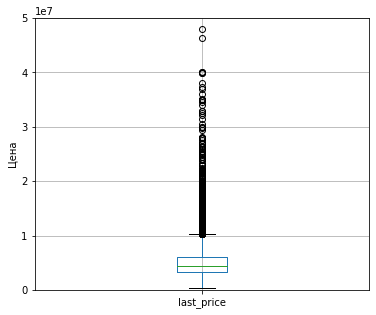

In [ ]:
#построим диаграмму размаха для столбца "цена продажи квартиры"
df_new['last_price'].plot(kind='box', figsize=(6, 5), grid=True)
plt.ylim(0, 50000000)
plt.ylabel('Цена')
plt.show()

<div style="border:solid green 2px; padding: 20px">Поскольку на "цену продажи квартиры" влияет рынок и привлекательность жилья в Петербурге в целом велика, к тому же за пределами усов до значения 20 млн. руб плотное скопление данных, оставим все значения до 16 млн.руб (к тому же мы уже до этого удалили много данных)  </div>

In [ ]:
#строка для удаления значений меньше 100 тыс и больше 15 млн.
df_new = df_new.drop(df_new[(df_new['last_price']<100000)|(df_new['last_price']>16000000)].index)

In [ ]:
#финальная проверка доли срезов выбросов и аномалий:
df_new.shape[0]/data.shape[0]

0.9007553061310604

<div style="border:solid green 2px; padding: 20px">
<b> Итоговые выводы по предобработке данных </b><br>
<b>Были выявлены следующие проблемы:</b><br>
<b>1) Критичное количество пропусков в столбцах balcony (49%), is_apartment (88%), ceiling_height (39%), parks_nearest (66%), ponds_nearest (61%).</b> Также обнаружены пропуски в locality_name (0.2%) , floors_total (0.4%), living_area (8%), kitchen_area (10%) и  в days_exposition (13%). <br>
Проблема пропусков в столбцах, заполняемых пользователем, вероятно, связана с недобросовестным заполнением (пользователь игнорировал/случайно пропускал некоторые поля); в столбцах заполняемых автоматически – не подтянулись из-за технической ошибки картографические данные. <br>Пропуски в parks_nearest(66%) и ponds_nearest(61%), а также в столбцах заполняемых автоматически (airports_nearest, city_centers_nearest, ponds_around3000, parks_around3000) оставляем без изменений, поскольку в данной работе они не являются предметом исследования. Пропуски в  days_exposition, вероятно,  связны с актуальностью объявления на момент выгрузки – их также оставили без изменений. <br>
В столбце is_apartment пропуски заполнены на основе гипотезы, что пользователь не внёс данные, подразумевая, что квартира не является апартаментами. Точно также и по столбцу balcony – отсутствие значения посчитали как отсутствие балкона. Строки с пропусками в locality_name и floors_total удалили, поскольку их доля была менее 1% .

<b>Предлагаем ввести ограничительную фичу, которая обяжет пользователя заполнять все поля, и не позволит отправить некачественно заполненное объявление.</b>

<b>2) Некорректно указаны типы данных в двух столбцах: is_apartment  и first_day_exposition;</b> после исправления пропусков в столбце is_apartment, тип данных сменился на корректный  тип bool;  first_day_exposition преобразовали в datetime, а balcony, floors_total в int т.к. по логике подобные значения должны быть целочисленными.
    
<b>3) Обнаружены неявные дубликаты. Выявлены 2 причины их появления:</b> 1)различия в написании слова "поселок" через "е" и через "ё" задваивают уникальные значения; 2) сам классификационный признак (поселок/пгт/деревня и т.д) также плодили дубликаты (н-р Мурино и поселок Мурино). Было решено, что обе причины необходимо устранить.
    
<b>4) Обнаружены редкие и выбивающиеся значения:</b>

<b>Аномалии:</b>
Высота потолков – двузначные числа (часть значений приведена к корректному виду, часть отброшена как выбросы);
Резкий разрыв между Q3 и максимальным значением в столбцах last_price, total_area, ceiling_height, floors_total, living_area, kitchen_area.
    
<b>Недостоверные данные:</b>
- общая площадь равна жилой (как минимум площадь туалета будет разницей у этих двух показателей);
- общая площадь меньше, чем сумма жилых комнат и кухни;
- количество балконов (выявлены объявления, где для 1-2 комнатных квартир указано 4-5 балконов);
- общая этажность дома выше 37 этажа (по данным из открытых источников, в Петербурге нет жилых зданий этажностью выше указанного).

<b>Для корректировки данных проведены следующие шаги:</b>
Проверены уникальные значения, построены диаграммы размаха для определения выбросов, использованы данные открытых источников для проверки расчетных значений (поскольку в Петербурге всё еще много коммунальных квартир с нестандартными параметрами). Удалены значения, признанные выбросами в столбцах ceiling_height, kitchen_area и living_area, last_price и все признанные недостоверными данные.


<b>После удаления аномальных значений и выбросов были заполнены пропуски в  столбцах ceiling_height, kitchen_area и living_area медианой.</b>
Для ceiling_height  мы предварительно разбили данные в зависимости от значений столбца city_centers_nearest (расстояние до центра). Воспользовавшись "Измерителем" в гугл картах (точка отсчёта - Александровская колонна) и другими открытыми источниками (в том числе данными Яндекс Недвижимости, где были отмечены районы сталинок/хрущёвок), установили радиус равный 5,5 км от центра (районы элитной, сталинской и дореволюционной застройки): до этой черты пропуски заполнялись медианой по категории «высокие потолки», после –  медианой «стандартные потолки». Такая дополнительная категоризация была сделана из-за того, что если взять просто медиану по столбцу, её значение будет стандартные 2.65 метров.
Для заполнения пропусков kitchen_area и living_area точно так же разбили на категории, с характерными для одно/двух/трёх комнатных квартир, а затем в соответствии с категорией заполним пропуски медианой, так как в выборке имелось значительное количество очень маленьких квартир (по гистограмме), таким образом не разбивая на подкатегории и заполняя средним мы с большей вероятностью исказим картину.

<b>Дополнительно была выявлена</b> высокая положительная корреляция (зависимость: с ростом одного параметра растёт другой) у  общей площади и жилой, у общей площади и площади кухни.
<b>По итогу манипуляций по предобработке ушло 10% данных.</b>
</div>

## Расчет и добавление в таблицу новых вспомогательных столбцов

In [ ]:
#цена одного квадратного метра
df_new['price_per_m2'] = df_new['last_price']/df_new['total_area']

In [ ]:
#день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
df_new['expo_weekday'] = df_new['first_day_exposition'].dt.weekday

In [ ]:
#месяц публикации объявления
df_new['expo_month'] = df_new['first_day_exposition'].dt.month

In [ ]:
#год публикации объявления
df_new['expo_year'] = df_new['first_day_exposition'].dt.year

In [ ]:
#тип этажа квартиры (значения — «первый», «последний», «другой») категоризция
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [ ]:
#добавляем столбец с категориями этажа
df_new['type_floor'] = df_new.apply(type_floor, axis=1)

In [ ]:
#расстояние в км до центра города
df_new['city_centers_km'] = (df_new['city_centers_nearest']/1000).round()

In [ ]:
#Проверяем, что пропуски не ушли, а данные округлены:
df_new['city_centers_km'].head(10)

1     19.00
2     14.00
5       NaN
6     19.00
7     12.00
8       NaN
9     15.00
10    14.00
11    52.00
12      NaN
Name: city_centers_km, dtype: float64

In [ ]:
#Выводим таблицу с добавленными столбцами:
df_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,new_loc_name,category,category_living,category_kitchen,price_per_m2,expo_weekday,expo_month,expo_year,type_floor,city_centers_km
1,7,3350000.00,40.40,2018-12-04,1,2.60,7.00,18.60,1,False,...,Шушары,стандартные потолки,маленькая,средняя,82920.79,1,12,2018,первый,19.00
2,10,5196000.00,56.00,2015-08-20,2,2.60,10.00,34.30,4,False,...,Санкт-Петербург,стандартные потолки,средняя,средняя,92785.71,3,8,2015,другой,14.00
5,10,2890000.00,30.40,2018-09-10,1,2.60,10.00,14.40,5,False,...,Янино-1,стандартные потолки,маленькая,средняя,95065.79,0,9,2018,другой,NaN
6,6,3700000.00,37.30,2017-11-02,1,2.60,6.00,10.60,6,False,...,Парголово,стандартные потолки,маленькая,средняя,99195.71,3,11,2017,последний,19.00
7,5,7915000.00,71.60,2019-04-18,2,2.60,5.00,17.20,22,False,...,Санкт-Петербург,стандартные потолки,маленькая,большая,110544.69,3,4,2019,другой,12.00


# Исследовательский анализ данных

## Изучаем параметры объектов:

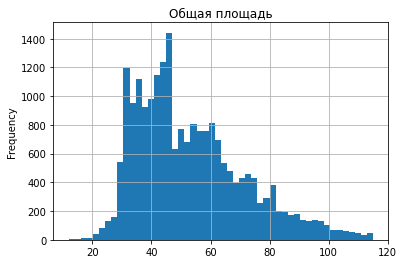

In [ ]:
df_new['total_area'].plot(title='Общая площадь', kind='hist', grid=True, bins=50)
plt.show()

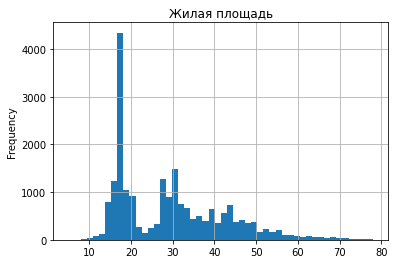

In [ ]:
df_new['living_area'].plot(title='Жилая площадь', kind='hist', grid=True, bins=50)
plt.show()

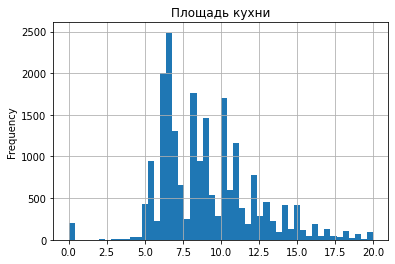

In [ ]:
df_new['kitchen_area'].plot(title='Площадь кухни', kind='hist', grid=True, bins=50)
plt.show()

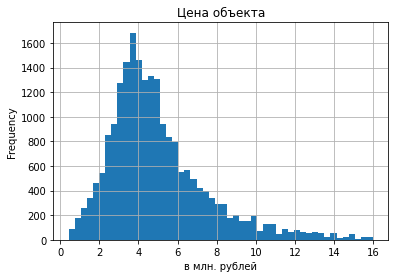

In [ ]:
df_new['last_price'].truediv(1000000).plot(title='Цена объекта', kind='hist', grid=True, bins=50)
plt.xlabel('в млн. рублей')
plt.show()

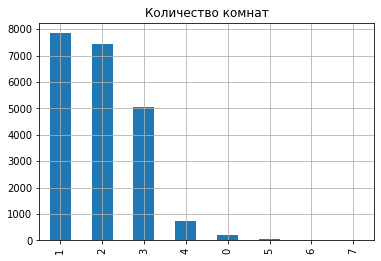

In [ ]:
df_new['rooms'].value_counts().plot(title='Количество комнат', kind='bar', grid=True)
plt.show()

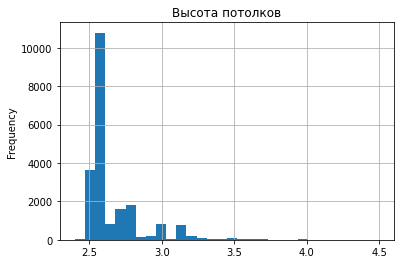

In [ ]:
df_new['ceiling_height'].plot(title='Высота потолков', kind='hist', grid=True, bins=30)
plt.show()

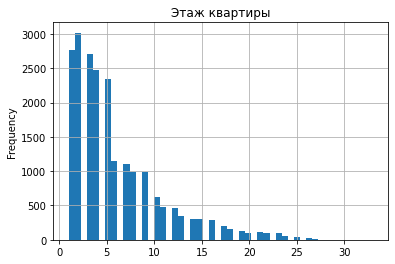

In [ ]:
df_new['floor'].plot(title='Этаж квартиры', kind='hist', grid=True, bins=50)
plt.show()

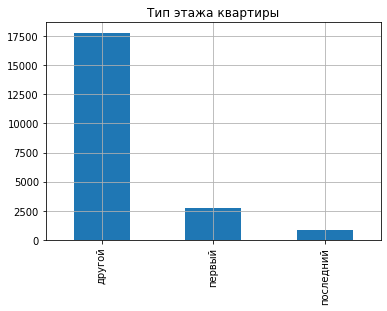

In [ ]:
df_new['type_floor'].value_counts().plot(title = 'Тип этажа квартиры', kind='bar', grid=True)
plt.show()

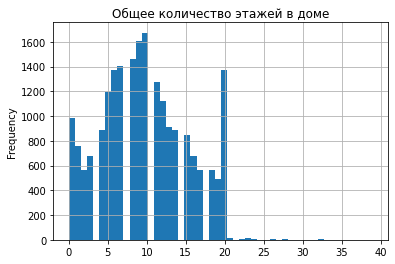

In [ ]:
df_new['floors_total'].plot(title='Общее количество этажей в доме', kind='hist', bins=50, grid=True)
plt.show()

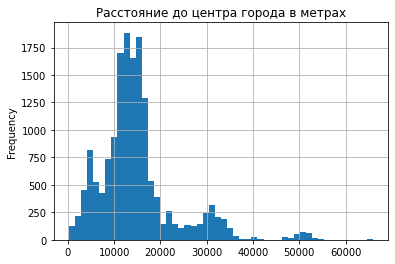

In [ ]:
df_new['city_centers_nearest'].plot(title='Расстояние до центра города в метрах', kind='hist', grid=True, bins=50)
plt.show()

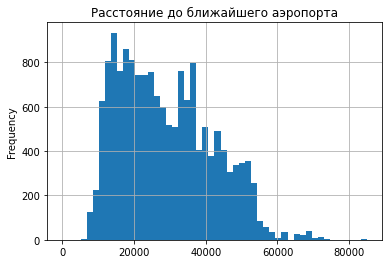

In [ ]:
df_new['airports_nearest'].plot(title='Расстояние до ближайшего аэропорта', kind='hist', grid=True, bins=50)
plt.show()

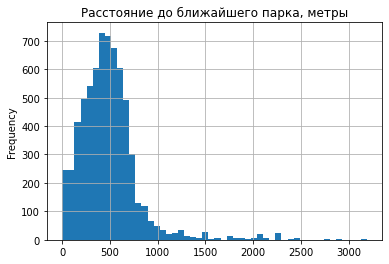

In [ ]:
df_new['parks_nearest'].plot(title='Расстояние до ближайшего парка, метры', kind='hist', grid=True, bins=50)
plt.show()

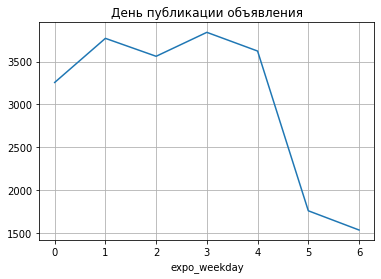

In [ ]:
df_new.groupby('expo_weekday')['expo_weekday'].agg('count').plot(title='День публикации объявления', grid=True)
plt.show()

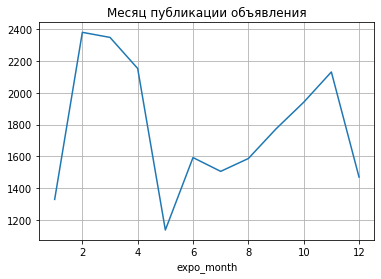

In [ ]:
df_new.groupby('expo_month')['expo_month'].agg('count').plot(title='Месяц публикации объявления', grid=True)
plt.show()

<div style="border:solid green 2px; padding: 20px"><b>Вывод:</b> данные в основном имеют асимметричное распределение с длинным хвостом справа; в выборке в основном 1-2 комнатные квартиры, общей площадью в районе 30-60 метров (максимум 115 кв.метров), стоимстью 3-5 млн.рублей, стандартными потолками 2,65 метров, расположенных в пределах 5 этажей; при этом дома в основном 9 и 20 этажные, расположенные в спальных районах (10-17 км от центра города), в относительной удалённости от аэропорта (от 10 км до 38 км) и близостью к паркам (меньше 700 метров). Среда и четверг - пиковые дни публикации объявлений, к выходным тренд, естественно, снижается. В разрезе месяца публикации: рост со второй половины зимы, вся весна, проседание летом (сезон отпусков) и снова рост осенью (с резким снижением в последние 2 месяца года). В целом, это свойственная для человека сезонность.</div>

## Определим, как быстро продавались квартиры


Среднее кол-во дней продажи квартиры: 173.24068630071088
Медиана кол-ва дней продажи квартиры: 91.0


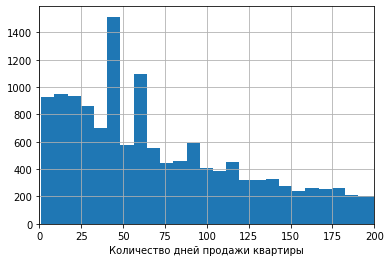

In [ ]:
#построим гистограмму по кол-ву дней размещения объявления, вычислим среднее значение и медиану
df_new['days_exposition'].hist(bins=200)
plt.xlim(0,200)
plt.xlabel('Количество дней продажи квартиры')
print('Среднее кол-во дней продажи квартиры:', df_new['days_exposition'].mean())
print('Медиана кол-ва дней продажи квартиры:', df_new['days_exposition'].median())

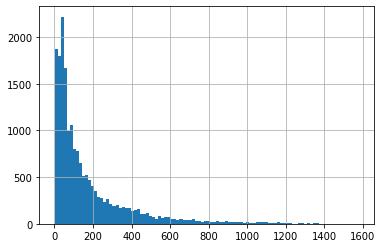

In [ ]:
df_new['days_exposition'].hist(bins=100)
plt.show()

<div style="border:solid green 2px; padding: 20px"> <b>Вывод:</b> Чаще всего продажи происходили до 50 дней с момента публикации объявления; меньше двух месяцев - быстрый срок для продажи квартиры. В среднем для продажи требовалось 173 дня. Длинный хвост гистограммы справа показывает долгие сделки - свыше 600 дней вплоть до 4.3 лет - это могут быть труднорасселяемые и дорогие бывшие коммуналки в центре. </div>

## Определим, какие факторы больше всего влияют на общую (полную) стоимость объекта:



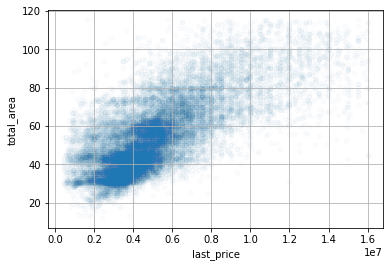

In [ ]:
#зависимость цены от общей площади
df_new.plot(x='last_price', y='total_area', kind='scatter', grid=True, alpha=0.02)
plt.show()

In [ ]:
#разделим значения общей площади на интервалы равного размера с помощью qcut, чтобы затем расчитать по ним статистики
df_new['total_area_grouped'] = pd.qcut(df_new['total_area'], 3)

In [ ]:
df_new.groupby('total_area_grouped')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
total_area_grouped,,,
"(11.999, 42.233]",7116,3396435.56,3400000.00
"(42.233, 59.0]",7249,4434918.34,4400000.00
"(59.0, 115.0]",6982,7136498.10,6700000.00


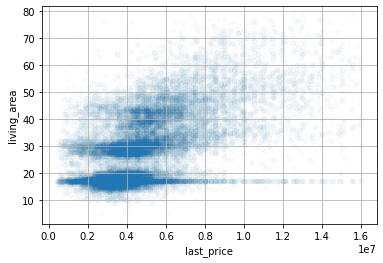

In [ ]:
#зависимость цены от жилой площади
df_new.plot(x='last_price', y='living_area', kind='scatter', grid=True, alpha=0.02)
plt.show()

In [ ]:
#разделим данные по жилой площади на интервалы равного размера с помощью qcut, чтобы затем посчитать по ним статистики
df_new['living_area_grouped'] = pd.qcut(df_new['living_area'], 3)

In [ ]:
df_new.groupby('living_area_grouped')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
living_area_grouped,,,
"(4.999, 18.8]",7140,3808095.87,3500000.00
"(18.8, 33.0]",7109,4379995.05,4200000.00
"(33.0, 78.0]",7098,6736770.77,6200000.00


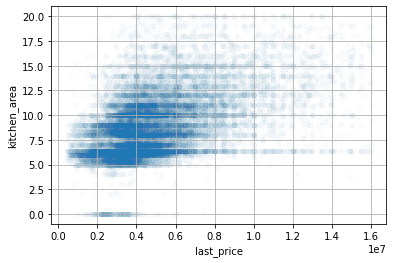

In [ ]:
#зависимость цены от площади кухни
df_new.plot(x= 'last_price', y= 'kitchen_area', kind='scatter', grid=True, alpha=0.02)
plt.show()

In [ ]:
#разделим данные по площади кухни на интервалы равного размера с помощью qcut, чтобы затем посчитать по ним статистики
df_new['kitchen_area_grouped'] = pd.qcut(df_new['kitchen_area'], 3)

In [ ]:
df_new.groupby('kitchen_area_grouped')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
kitchen_area_grouped,,,
"(-0.001, 7.0]",7518,3910151.16,3650000.00
"(7.0, 10.0]",7290,4700375.23,4350000.00
"(10.0, 20.0]",6539,6496794.06,5900000.00


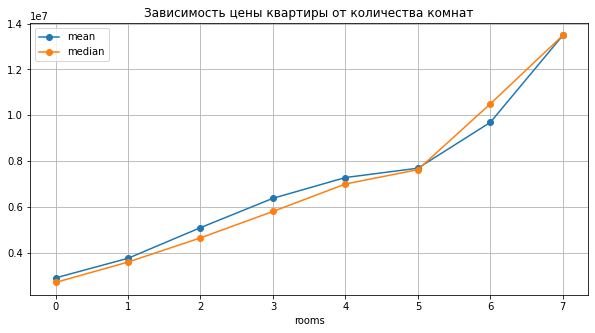

In [ ]:
#зависимость цены от количества комнат
df_new.groupby('rooms')['last_price'].agg(['mean', 'median']).plot(
    title='Зависимость цены квартиры от количества комнат', style='o-', figsize=(10, 5), grid=True
)
plt.show()

In [ ]:
#рассчитаем среднее значение и медиану цены в зависимости от кол-ва комнат
df_new.groupby('rooms')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
rooms,,,
0,188,2898678.99,2700000.00
1,7844,3754698.43,3590000.00
2,7428,5092895.97,4646500.00
3,5067,6374843.39,5800000.00
4,746,7281240.45,6999500.00
5,68,7689264.71,7625000.00
6,5,9690800.00,10500000.00
7,1,13490000.00,13490000.00


In [ ]:
#укрупним метрику и проверим зависимость
df_new['rooms_grouped'] = pd.qcut(df_new['rooms'], 4)

In [ ]:
#рассчитаем среднее и медиану по группам
df_new.groupby('rooms_grouped')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
rooms_grouped,,,
"(-0.001, 1.0]",8032,3734662.11,3550000.00
"(1.0, 2.0]",7428,5092895.97,4646500.00
"(2.0, 3.0]",5067,6374843.39,5800000.00
"(3.0, 7.0]",820,7337340.70,7074000.00


In [ ]:
#зависимость цены от этажа (первый/последний/другой)
df_new.groupby('type_floor')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
type_floor,,,
другой,17774,5096354.94,4500000.00
первый,2760,4151646.06,3800000.00
последний,813,5047518.33,4400000.00


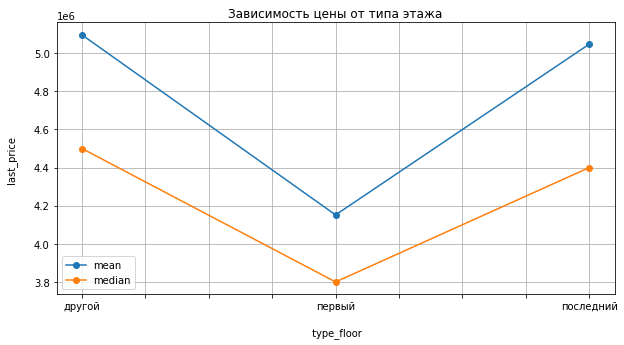

In [ ]:
#визуализируем
df_new.groupby('type_floor')['last_price'].agg(['mean', 'median']).plot(
    xlabel =' \n type_floor', ylabel ='last_price \n', title= 'Зависимость цены от типа этажа', style='o-', figsize=(10, 5), grid=True)
plt.show()

In [ ]:
#зависимость цены от дня размещения
df_new.groupby('expo_weekday')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
expo_weekday,,,
0,3256,4980446.17,4427500.00
1,3770,5014508.10,4480000.00
2,3561,5019183.19,4495000.00
3,3840,4996692.12,4400000.00
4,3622,4923561.40,4350000.00
5,1761,4884629.91,4400000.00
6,1537,4897968.88,4350000.00


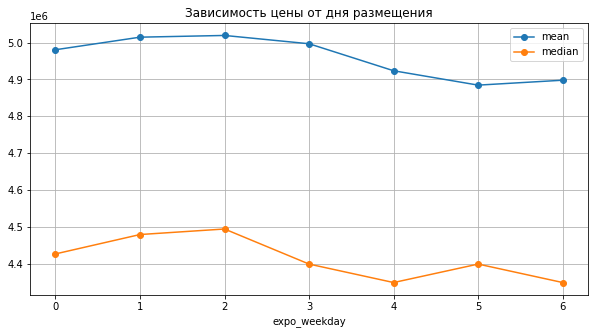

In [ ]:
#визуализируем
df_new.groupby('expo_weekday')['last_price'].agg(['mean', 'median']).plot(
    title='Зависимость цены от дня размещения', style='o-', figsize=(10, 5), grid=True
)
plt.show()

In [ ]:
#Зависимость цены от месяца размещения:
df_new.groupby('expo_month')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
expo_month,,,
1,1328,4942117.91,4400000.00
2,2382,4943277.51,4400000.00
3,2350,4968167.64,4450000.00
4,2154,5107478.40,4600000.00
5,1135,4907551.64,4350000.00
6,1592,4780797.69,4200000.00
7,1505,4928901.95,4350000.00
8,1586,4995082.32,4392500.00
9,1773,5089954.25,4450000.00


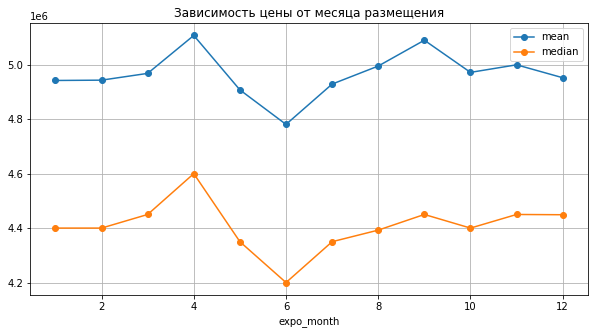

In [ ]:
#визуализируем
df_new.groupby('expo_month')['last_price'].agg(['mean', 'median']).plot(
    title='Зависимость цены от месяца размещения', style='o-', figsize=(10, 5), grid=True
)
plt.show()

In [ ]:
#зависимость цены от года размещения
df_new.groupby('expo_year')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
expo_year,,,
2014,90,6415447.62,5660000.00
2015,978,5372419.12,4850000.00
2016,2457,4927543.61,4300000.00
2017,7412,4887019.38,4299500.00
2018,7811,4901798.15,4399000.00
2019,2599,5269589.97,4833675.00


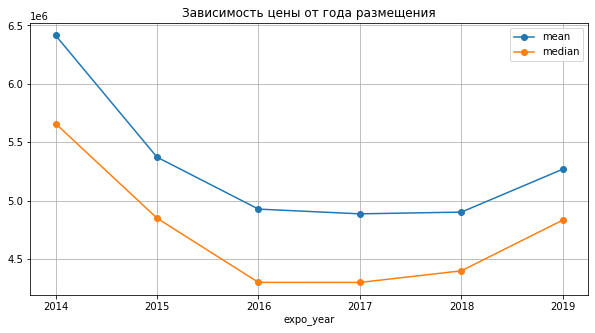

In [ ]:
df_new.groupby('expo_year')['last_price'].agg(['mean', 'median']).plot(
    title= 'Зависимость цены от года размещения', style='o-', figsize=(10, 5), grid=True)
plt.show()

In [ ]:
df_new[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.00,0.72,0.55,0.47,0.44
total_area,0.72,1.00,0.85,0.43,0.81
living_area,0.55,0.85,1.00,0.22,0.83
kitchen_area,0.47,0.43,0.22,1.00,0.09
rooms,0.44,0.81,0.83,0.09,1.00


<div style="border:solid green 2px; padding: 20px"><b>Вывод:</b> Для определения факторов, что больше всего влияют на общую (полную) стоимость объекта, были использованы различные способы - сводные таблицы, диаграммы рассеяния, линейные графики. <br> В ходе расчетов и визуализаций <b>была выявлена высокая положительная корреляция (рост одного параметра влечёт за собой рост другого) у общей площади (что логично, поскольку больше квадратных метров - больше стоимость квартиры),</b> средней силы положительная корреляция у параметров жилой площади и площади кухни (по рассчётам коэффициенты составляют 0.55 и 0.47 соответственно); также у параметра "количество комнат" - заметен тренд увеличения стоимости квартиры с ростом количества комнат (коэффициент корреляции 0.44), особенно на рубеже от 5 комнат. <br> <b>Между ценой и типом этажа (первый/последний/другой) выявлена нелинейная зависимость - обычно квартиры на первом самые дешёвые (как и показано на графике) из-за шума, запахов, проблемы с приватностью и риском грабежа На последнем этаже цену снижают риски протекающей крыши, слабого напора воды в кранах, проблемы с лифтом.</b> <br>    
Что касается дня, месяца и года публикации объявления, заметны следующие тренды, связанные в целом с ритмом жизни среднестатистического человека и сезонностью: 1) по дням - тренд снижения к выходным, с пиком во вторник среду (однако это в большей степени связано с тем, что в выходные публиковалось меньше объявлений), 2) месяцы отражают общую сезонность - пик предложений и цены в апреле (вероятно куммулятивный эффект с уже опубликованными с начала года обьявлениями) со спадом предложения и цены ближе к лету. По графику зависимости цены от года публикации объявления заметна тенденция падения цены с 2014 года по 2017 (минимальные значения именно в 2017 году), после 2017 идёт тренд на рост цены. Но в целом у этих параметров (цена и дата/месяц/год) практически нет линейной корреляции.
    </div>

## Определим населённые пункты с самой высокой и низкой средней стоимостью квадратного метра:

In [ ]:
#расcчитываем кол-во сделок и среднюю цену кв.м. по населённым пунктам
top_locality_ppm_mean = df_new.pivot_table(index = 'new_loc_name', values = 'price_per_m2', aggfunc = ['count', 'mean'])

top_locality_ppm_mean.columns=['Количество сделок', 'Средняя цена кв.м']
top_locality_ppm_mean = top_locality_ppm_mean.astype(int).sort_values(by='Количество сделок', ascending = False).head(10)

top_locality_ppm_mean


,Количество сделок,Средняя цена кв.м
new_loc_name,,
Санкт-Петербург,13691,107364
Мурино,574,86020
Кудрово,449,95567
Шушары,428,78644
Всеволожск,384,66975
Пушкин,332,100689
Колпино,329,75390
Парголово,323,90256
Гатчина,298,68683


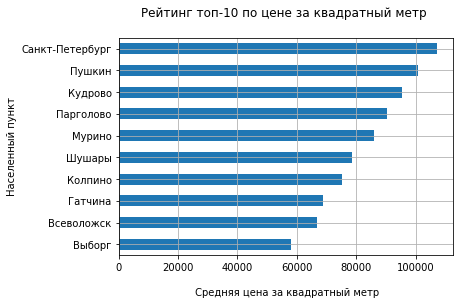

In [ ]:
#визуализируем полученнные результаты
top_locality_ppm_mean['Средняя цена кв.м'].sort_values().plot(kind='barh', grid=True)
plt.title('Рейтинг топ-10 по цене за квадратный метр \n')
plt.xlabel('\n Средняя цена за квадратный метр')
plt.ylabel('Населенный пункт')
plt.show()

<div style="border:solid green 2px; padding: 20px"> Наибольшее количество объявлений в выборке - Санкт-Петербург и близлежащие внутригородские/ областные поселения; замыкают топ-10 города-административные центры Ленинградской области. Самая высокая стоимость квадратного метра в Санкт-Петербурге, самая низкая - город Выборг. </div>

## Вычислим среднюю цену каждого километра, выясним, как стоимость объектов зависит от расстояния до центра города:

In [ ]:
spb_estate = df_new[df_new['new_loc_name'] == 'Санкт-Петербург'] #Оставляем данные по Петербургу
spb_estate_ppkm = spb_estate.groupby('city_centers_km')['last_price'].agg('mean') #рассчитываем среднюю цену по удалённости
spb_estate_ppkm.columns = ['Расстояние от центра в км', 'Средняя стоимость квартиры']

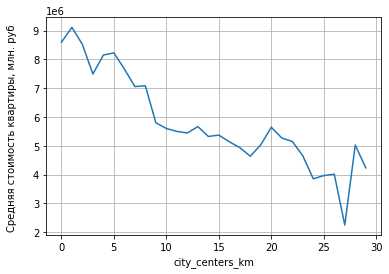

In [ ]:
#визуализируем
spb_estate_ppkm.plot(x = 'Расстояние от центра в км', y = 'Средняя стоимость квартиры', grid=True)
plt.ylabel('Средняя стоимость квартиры, млн. руб \n')
plt.show()

<div style="border:solid green 2px; padding: 20px">  Мы видим явный тренд на снижение стоимости квартиры по мере удаленности от цента города; исключение составляют подъемы в районе 20 и 27 км; их можно объяснить тем, что примерно на этом расстоянии находятся зелёные и исторически значимые районы на берегу Финского залива (Приморский район: Ольгино/Лисий нос, Курортный район: Солнечное/Репино/Комарово, Петродворцовый район: Стрельна/Петергоф) </div>

# Общий вывод

<div class="alert alert-info"> <b></b>
Полученный в работу датасет имел значительное количество проблем: <br>    
<b>1)	Имелось критичное количество пропущенных значений -  от 30 до 88%. </b>Столбцы, заполняемые пользователем были заполнены некачественно (много пропусков, аномальных и недостоверных значений); в столбцах, заполняемых автоматически, вероятно,  из-за технической ошибки не все картографические данные подтянулись. Предлагаем ввести ограничительную фичу, которая обяжет пользователя заполнять все поля, и не позволит отправить некачественно заполненное объявление. <br>     
<b>2)	Обнаружены неявные дубликаты; </b><br>     
<b>3)	Некорректно указаны типы данных;</b><br>     
<b>4)	Обнаружены редкие и выбивающиеся значения:<br>     
-  Аномалии:</b> Высота потолков – двузначные значения , значения меньше нормативов; <br>
-  <b>Недостоверные данные:</b>
    - общая площадь равна жилой;
    - общая площадь меньше, чем сумма жилых комнат и кухни;
    - количество балконов (найдены объявления, где для 1-2 комнатных квартир указано 4-5 балконов);
    - общая этажность дома выше 37 этажа (по данным из открытых источников, в Петербурге нет жилых зданий этажностью выше указанного) <br>     
<b>Выбросы</b><br>     
<b>По итогу предобработки данные были очищены от выбросов, аномальных и недостоверных значений,  необходимые для последующего анализа пропуски – заполнены.</b> По итогу манипуляций по предобработке ушло 10% данных. <br>
<b>Общая характеристика данных:</b><br>
Большую часть выборки составляют 1-2 комнатные квартиры, общей площадью в районе 30-60 квадратных метров, стоимостью 3-5 млн.рублей, стандартными потолками 2,65 метров, расположением в пределах 5 этажей; <br> при этом дома в основном 9 и 20 этажные, расположенные в спальных районах (10-17 км от центра города), в относительной удалённости от аэропорта (от 10 км до 38 км) и близостью к паркам (меньше 700 метров). <br> Среда и четверг - пиковые дни публикации объявлений, к выходным тренд закономерно снижается.<br>  В разрезе месяца публикации: рост со второй половины зимы, вся весна, проседание летом (сезон отпусков) и снова рост осенью (с резким снижением в последние 2 месяца года). В целом, характерная для человека сезонность.<br>     
Чаще всего продажи происходили до 50 дней с момента публикации объявления; меньше двух месяцев - быстрый срок для продажи квартиры. В среднем для продажи требовалось 173 дня. Длинный хвост гистограммы справа показывает долгие сделки - свыше 600 дней вплоть до 4.3 лет - это могут быть труднорасселяемые и дорогие бывшие коммуналки в центре.
    
<b>В ходе проведённого анализа данных были обнаружены следующие зависимости:</b>  
 </div>

 <div class="alert alert-info">Чаще всего продажи происходили сроком до 50 дней с момента публикации объявления; меньше двух месяцев - быстрый срок для продажи квартиры. В среднем для продажи требовалось 173 дня. Длинный хвост гистограммы справа показывает долгие сделки - свыше 600 дней вплоть до 4.3 лет - это могут быть труднорасселяемые и дорогие бывшие коммуналки в центре. </div>

Среднее кол-во дней продажи квартиры: 173.24068630071088
Медиана кол-ва дней продажи квартиры: 91.0


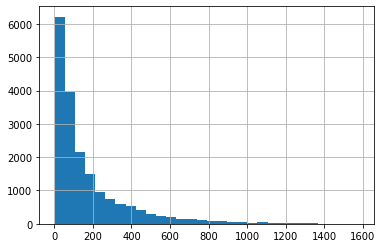

In [ ]:
df_new['days_exposition'].hist(bins=30)
print('Среднее кол-во дней продажи квартиры:', df_new['days_exposition'].mean())
print('Медиана кол-ва дней продажи квартиры:', df_new['days_exposition'].median())

<div class="alert alert-info"> Наибольшее количество объявлений в выборке - <b>Санкт-Петербург</b> и близлежащие внутригородские/ областные поселения; замыкают топ-10 города-административные центры Ленинградской области. <b>Самая высокая стоимость квадратного метра в Санкт-Петербурге, самая низкая - город Выборг.</b> </div>

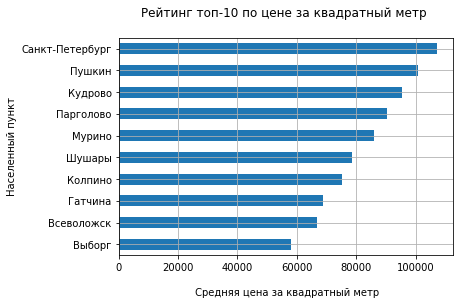

In [ ]:
top_locality_ppm_mean['Средняя цена кв.м'].sort_values().plot(kind='barh', grid=True)
plt.title('Рейтинг топ-10 по цене за квадратный метр \n')
plt.xlabel('\n Средняя цена за квадратный метр')
plt.ylabel('Населенный пункт')
plt.show()

<div class="alert alert-info">
Для решения поставленной задачи - определения факторов, что больше всего влияют на общую стоимость объекта недвижимости - были использованы сводные таблицы, диаграммы рассеяния, линейные графики.
    
В ходе расчетов и визуализаций <b>была выявлена:</b>
    
- высокая положительная корреляция (рост одного параметра влечёт за собой рост другого) <b>между стоимостью объекта и общей площадью</b>;
- <b>средней силы положительная корреляция</b> между стоимостью объекта и жилой площадью/площади кухни;
- между стоимостью объекта и параметра "количество комнат" - заметен тренд увеличения стоимости квартиры с ростом количества комнат, особенно на рубеже от 5 комнат.
- между ценой и типом этажа (первый/последний/другой) выявлена нелинейная зависимость - обычно квартиры на первом самые дешёвые из-за шума, запахов, проблемы с приватностью и риском грабежа. На последнем этаже цену снижают риски протекающей крыши, напора воды в кранах, проблемы с лифтом.  
    
<b>Что касается дня, месяца и года публикации объявления, заметны следующие тренды, связанные в целом с ритмом жизни среднестатистического человека и сезонностью:</b>
    1) по дням - тренд снижения к выходным, с пиком во вторник среду (однако это в большей степени связано с тем, что в выходные публиковалось меньше объявлений);
    2) месяцы отражают общую сезонность - пик предложений и цены в апреле (вероятно куммулятивный эффект с уже опубликованными с начала года обьявлениями) со спадом предложения и цены ближе к лету;
    3) по году публикации объявления заметна тенденция падения цены с 2014 года по 2017 (минимальные значения именно в 2017 году), после 2017 идёт тренд на рост цены.
    
В целом у этих параметров (дата/месяц/год) нет линейной зависимости.

<b>На тепловой карте ниже наглядно отображены факторы, наибольшим образом влияющие на общую стоимость объекта недвижимости.</b>    
</div>


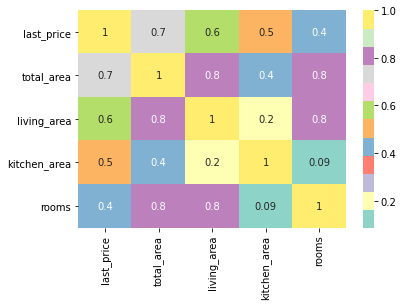

In [ ]:
sns.heatmap(
    df_new[
    ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']
].corr(), annot = True, cmap= 'Set3', fmt = '.1g'
)
plt.show()

 <div class="alert alert-info">Касаемо зависимости стоимости объектов от расстояния до центра города мы видим явный тренд на снижение стоимости квартиры по мере удаленности от цента; исключение составляют подъемы в районе 20 и 27 км. Но их можно объяснить тем, что примерно на этом расстоянии находятся зелёные и исторически значимые районы на берегу Финского залива (Приморский район: Ольгино/Лисий нос, Курортный район: Солнечное/Репино/Комарово, Петродворцовый район: Стрельна/Петергоф)</div>

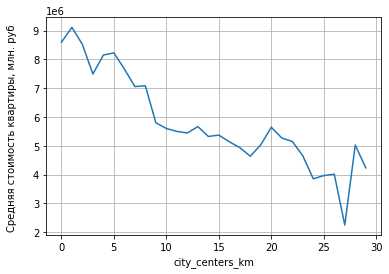

In [ ]:
spb_estate_ppkm.plot(x = 'Расстояние от центра в км', y = 'Средняя стоимость квартиры', grid=True)
plt.ylabel('Средняя стоимость квартиры, млн. руб \n')
plt.show()

 <div class="alert alert-info"> <b>Дополнительно</b> была выявлена высокая положительная корреляция (зависимость: с ростом одного параметра растёт другой) у  общей площади и жилой, у общей площади и площади кухни. </div>

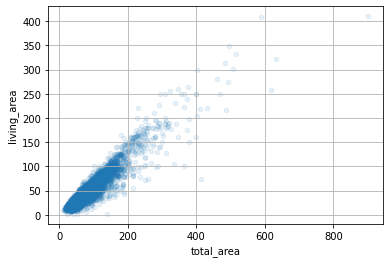

In [ ]:
#строим совместную диаграмму распределения total_area и living_area
df.plot(x='total_area', y='living_area', kind='scatter', grid=True, alpha=0.1)
plt.show()

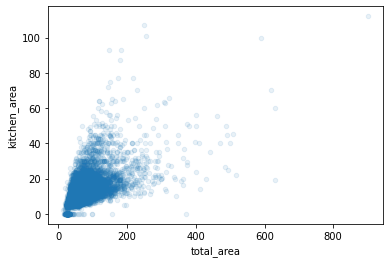

In [ ]:
#строим совместную диаграмму распределения total_area и kitchen_area
df.plot(x= 'total_area', y= 'kitchen_area', kind='scatter', alpha=0.1)
plt.show()